In [1]:
import os
os.environ['KAGGLE_USERNAME']='asrapervaiz'
os.environ['KAGGLE_KEY'] = '46a2d40a05c1e0f41adf0e11fa8c2ea6'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d firedmosquito831/student-academic-performance-simulation-4000

Dataset URL: https://www.kaggle.com/datasets/firedmosquito831/student-academic-performance-simulation-4000
License(s): MIT
  0% 0.00/29.5k [00:00<?, ?B/s]
100% 29.5k/29.5k [00:00<00:00, 92.9MB/s]


In [5]:
!unzip student-academic-performance-simulation-4000.zip

Archive:  student-academic-performance-simulation-4000.zip
  inflating: SAP-4000.csv            


In [6]:
df = pd.read_csv('SAP-4000.csv')

In [7]:
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [9]:
df.isnull().sum()

,0
Gender,0
HoursStudied/Week,0
Tutoring,0
Region,0
Attendance(%),0
Parent Education,422
Exam_Score,0


In [10]:
df['Parent Education'].fillna('Unknown', inplace=True)

/tmp/ipython-input-10-2224966747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parent Education'].fillna('Unknown', inplace=True)


In [11]:
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,Unknown,79.5
4,Female,8.9,No,Urban,50.8,Unknown,52.2


In [12]:
cat_cols = ['Gender', 'Tutoring', 'Region', 'Parent Education']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [13]:
print(f'Duplicates count: {df.duplicated().sum()}')
df = df.drop_duplicates()

Duplicates count: 0


In [14]:
print(df.describe(include='all'))

        Gender  HoursStudied/Week Tutoring Region  Attendance(%)  \
count     4000        4000.000000     4000   4000    4000.000000   
unique       2                NaN        2      2            NaN   
top     Female                NaN       No  Urban            NaN   
freq      2040                NaN     2767   2423            NaN   
mean       NaN           9.861025      NaN    NaN      75.224150   
std        NaN           3.713801      NaN    NaN      14.496906   
min        NaN           0.000000      NaN    NaN      50.000000   
25%        NaN           7.400000      NaN    NaN      62.600000   
50%        NaN           9.900000      NaN    NaN      75.600000   
75%        NaN          12.600000      NaN    NaN      87.700000   
max        NaN          16.000000      NaN    NaN     100.000000   

       Parent Education   Exam_Score  
count              4000  4000.000000  
unique                4          NaN  
top           Secondary          NaN  
freq               1590    

In [15]:
print((df['HoursStudied/Week'] < 0).sum())  # Should be 0
print((df['Attendance(%)'] < 50).sum())

0
0


In [16]:
df['Study_Efficiency'] = df['HoursStudied/Week'] * df['Attendance(%)'] / 100

In [17]:
df['High_Attendance'] = (df['Attendance(%)'] >= 85).astype(int)

In [19]:
edu_map = {'Primary': 0, 'Secondary': 1, 'Tertiary': 2, 'Unknown': -1}
df['Parent_Edu_Rank'] = df['Parent Education'].map(edu_map)

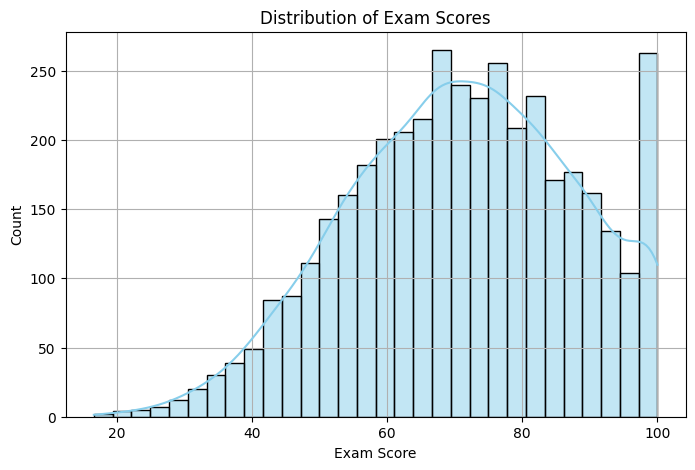

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

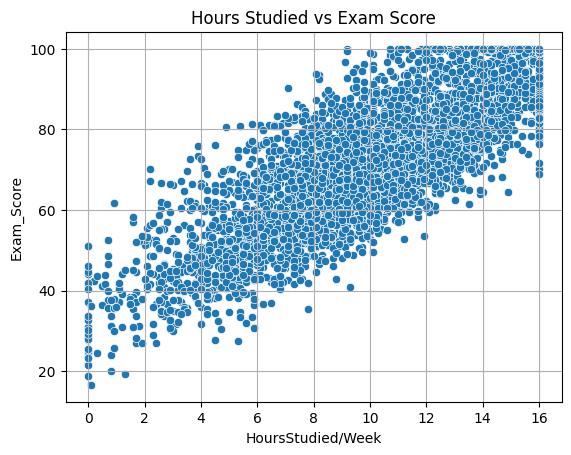

In [21]:
sns.scatterplot(x='HoursStudied/Week', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.grid(True)
plt.show()

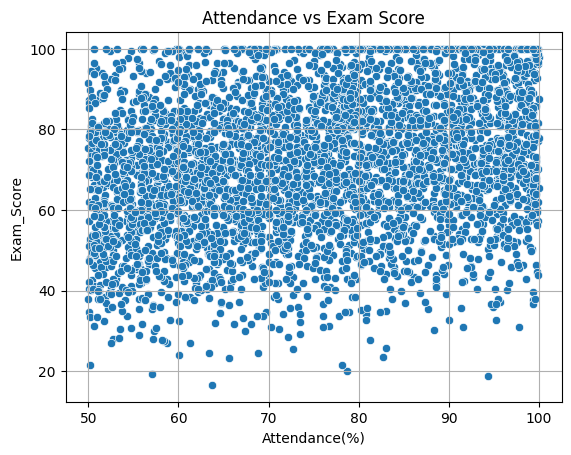

In [22]:
sns.scatterplot(x='Attendance(%)', y='Exam_Score', data=df)
plt.title('Attendance vs Exam Score')
plt.grid(True)
plt.show()

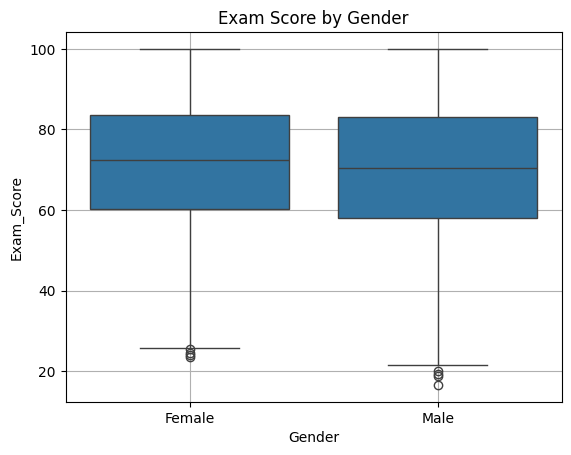

In [23]:
sns.boxplot(x='Gender', y='Exam_Score', data=df)
plt.title('Exam Score by Gender')
plt.grid(True)
plt.show()

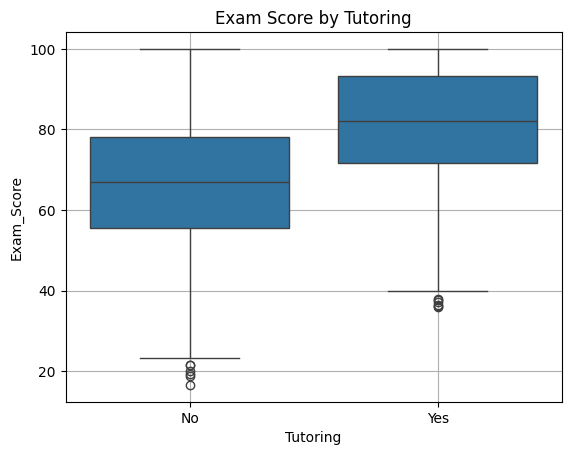

In [24]:
sns.boxplot(x='Tutoring', y='Exam_Score', data=df)
plt.title('Exam Score by Tutoring')
plt.grid(True)
plt.show()

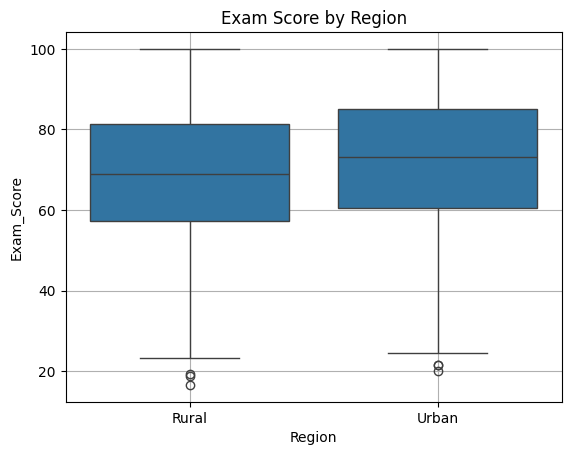

In [25]:
sns.boxplot(x='Region', y='Exam_Score', data=df)
plt.title('Exam Score by Region')
plt.grid(True)
plt.show()

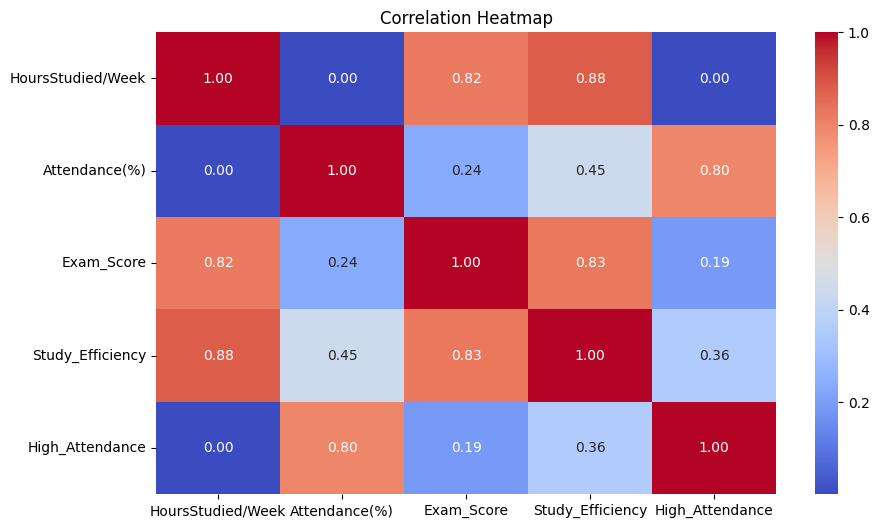

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

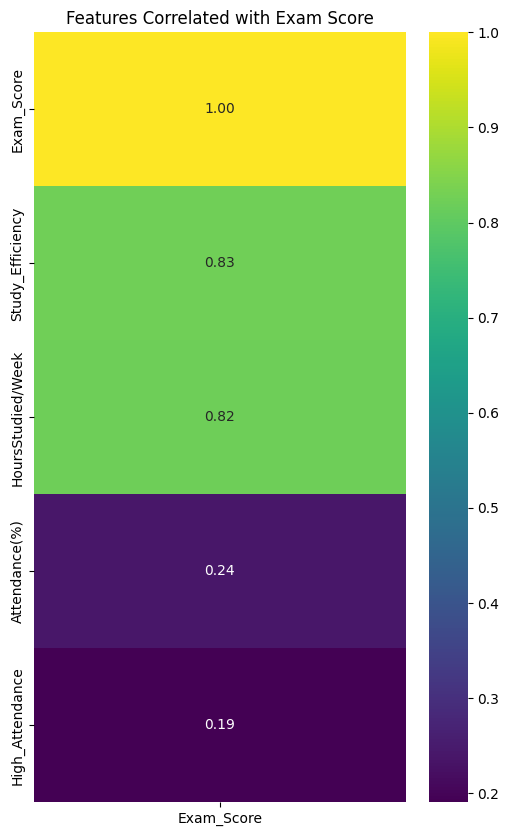

In [27]:
plt.figure(figsize=(6, 10))
sns.heatmap(df.corr(numeric_only=True)[['Exam_Score']].sort_values(by='Exam_Score', ascending=False),
            annot=True, cmap='viridis', fmt='.2f')
plt.title('Features Correlated with Exam Score')
plt.show()

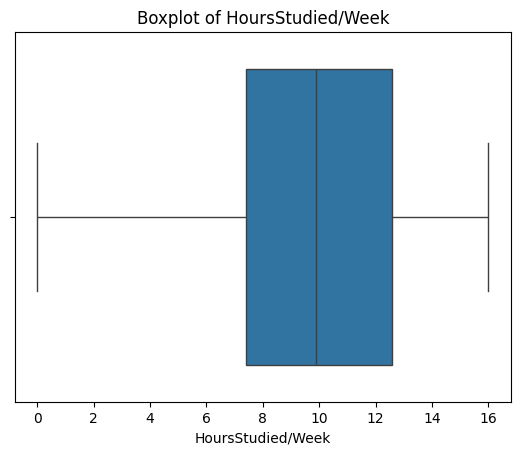

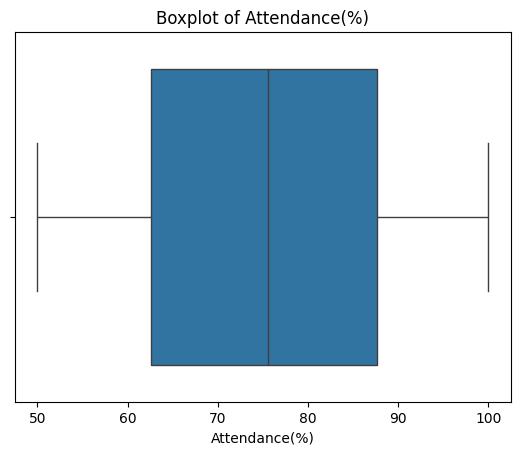

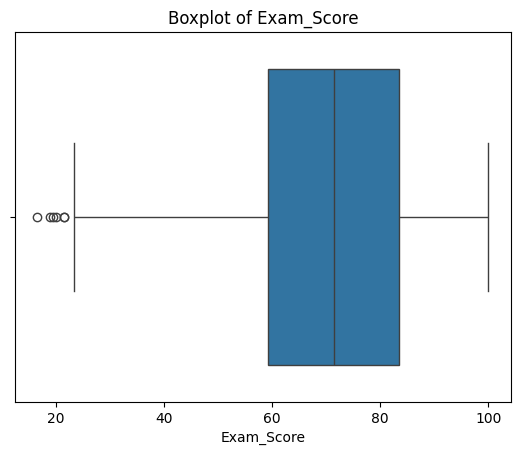

In [28]:
for col in ['HoursStudied/Week', 'Attendance(%)', 'Exam_Score']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Effort Matters Most:

Hours studied and study efficiency are the strongest predictors of exam scores.

Tutoring is Effective:

Receiving tutoring appears to significantly boost exam performance.

Attendance is Less Critical (but still positive):
 While beneficial, attendance alone doesn't guarantee a high score, and its impact is less pronounced than dedicated study time.

Demographics (Gender, Region) are Not Significant:
Gender and urban/rural region do not seem to have a noticeable impact on exam scores in this dataset.

In summary, to improve exam scores, students should focus on increasing their study hours, improving their study efficiency, and considering tutoring if available.

In [29]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Tutoring', 'Region', 'Parent Education']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [30]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [31]:
X = X.drop('Study_Level', axis=1)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

Random Forest Performance:
MAE: 4.19, MSE: 29.02, R²: 0.90


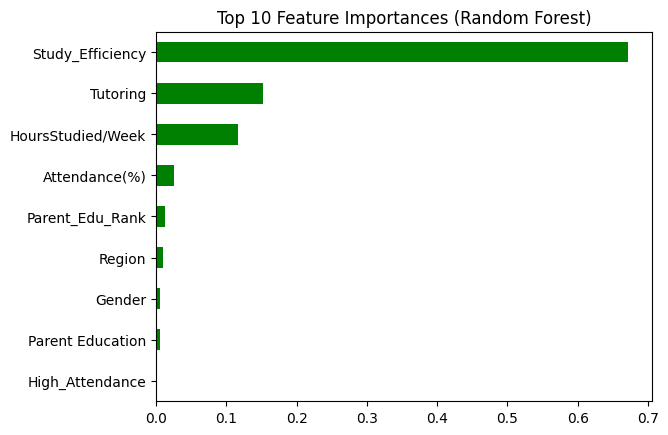

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear Regression R²: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression R²: 0.92


In [47]:
categorical_cols = ['Gender', 'Tutoring', 'Region', 'Parent Education', 'Study_Level']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])     # Label encode original df
    label_encoders[col] = le

In [48]:
from sklearn.preprocessing import LabelEncoder

# List of all categorical columns
categorical_cols = ['Gender', 'Tutoring', 'Region', 'Parent Education', 'Study_Level']

# Initialize a dictionary to store encoders
label_encoders = {}

# Apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use same encoder on test data
    label_encoders[col] = le

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Predict
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

Random Forest Performance:
MAE: 4.19, MSE: 28.89, R²: 0.90


In [52]:
df.to_csv('Student_Academic.csv',index=False)

In [54]:
# Combine input features with predictions
predictions_df = X_test.copy()
predictions_df['Actual_Exam_Score'] = y_test.values
predictions_df['Predicted_Exam_Score'] = y_pred

# Export to CSV for Power BI
predictions_df.to_csv('exam_score_predictions_powerbi.csv', index=False)

In [56]:
# Drop the target column to match model input
X_original = df.drop(columns=['Exam_Score'])

# Encode X_original just for prediction
X_encoded = X_original.copy()
for col in categorical_cols:
    X_encoded[col] = label_encoders[col].transform(X_encoded[col])

# Predict using the trained model
df['Predicted_Exam_Score'] = rf.predict(X_encoded)

In [59]:
df.to_csv('Student_Academic_Eval.csv', index=False)

print("✅ Saved: predictions_human_readable.csv (with original categories)")

✅ Saved: predictions_human_readable.csv (with original categories)
